In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
books = pd.read_csv('books.csv')

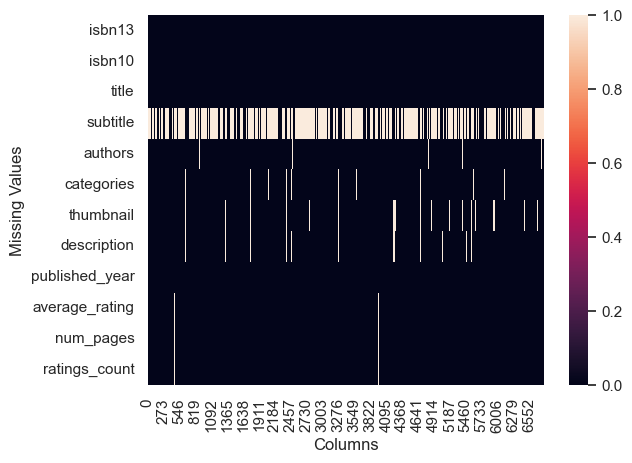

In [83]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(),cbar=True,ax=ax)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

In [84]:
books.shape

(6810, 12)

In [85]:
books['missing_description'] = np.where(books['description'].isna(),1,0)
books['age_of_book'] = 2025 - books['published_year']

In [86]:
columns_of_interest = ['num_pages','age_of_book','missing_description','average_rating']
columns_of_interest

['num_pages', 'age_of_book', 'missing_description', 'average_rating']

In [87]:
#if we do have continues features only we can go with pearson's correlation if there is binary choose spearman
correlation_matrix = books[columns_of_interest].corr(method='spearman')

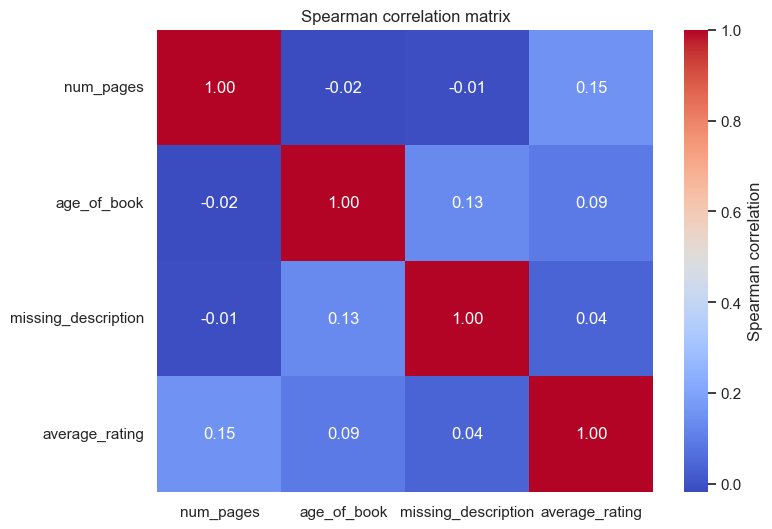

In [88]:
sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',cbar_kws={'label':'Spearman correlation'})
heatmap.set_title('Spearman correlation matrix')
plt.show()

### Remove those rows with missing information

In [89]:
book_to_remove = books[(books['description'].isna())| (books['num_pages'].isna())|(books['average_rating'].isna())|books['published_year'].isna()]

In [90]:
book_to_remove.shape

(303, 14)

In [91]:
new_book = books.drop(book_to_remove.index,axis=0)

In [93]:
new_book.shape

(6507, 14)

In [95]:
new_book.describe(include='all')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
count,6.507000e+03,6507,6507,2281,6444,6474,6293,6507,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000
unique,NaN,6507,6133,1915,3629,531,6293,6434,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,9042003405,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=2lVyR...,No Marketing Blurb,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,10,225,37,2523,1,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.780668e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502
std,5.868404e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000
25%,9.780317e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000
50%,9.780552e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.950000,304.000000,1.081000e+03,0.0,23.000000
75%,9.780807e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,418.000000,6.309500e+03,0.0,28.000000


In [96]:
new_book['categories'].value_counts().reset_index().sort_values('count',ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


- we can uneven distribution of categories

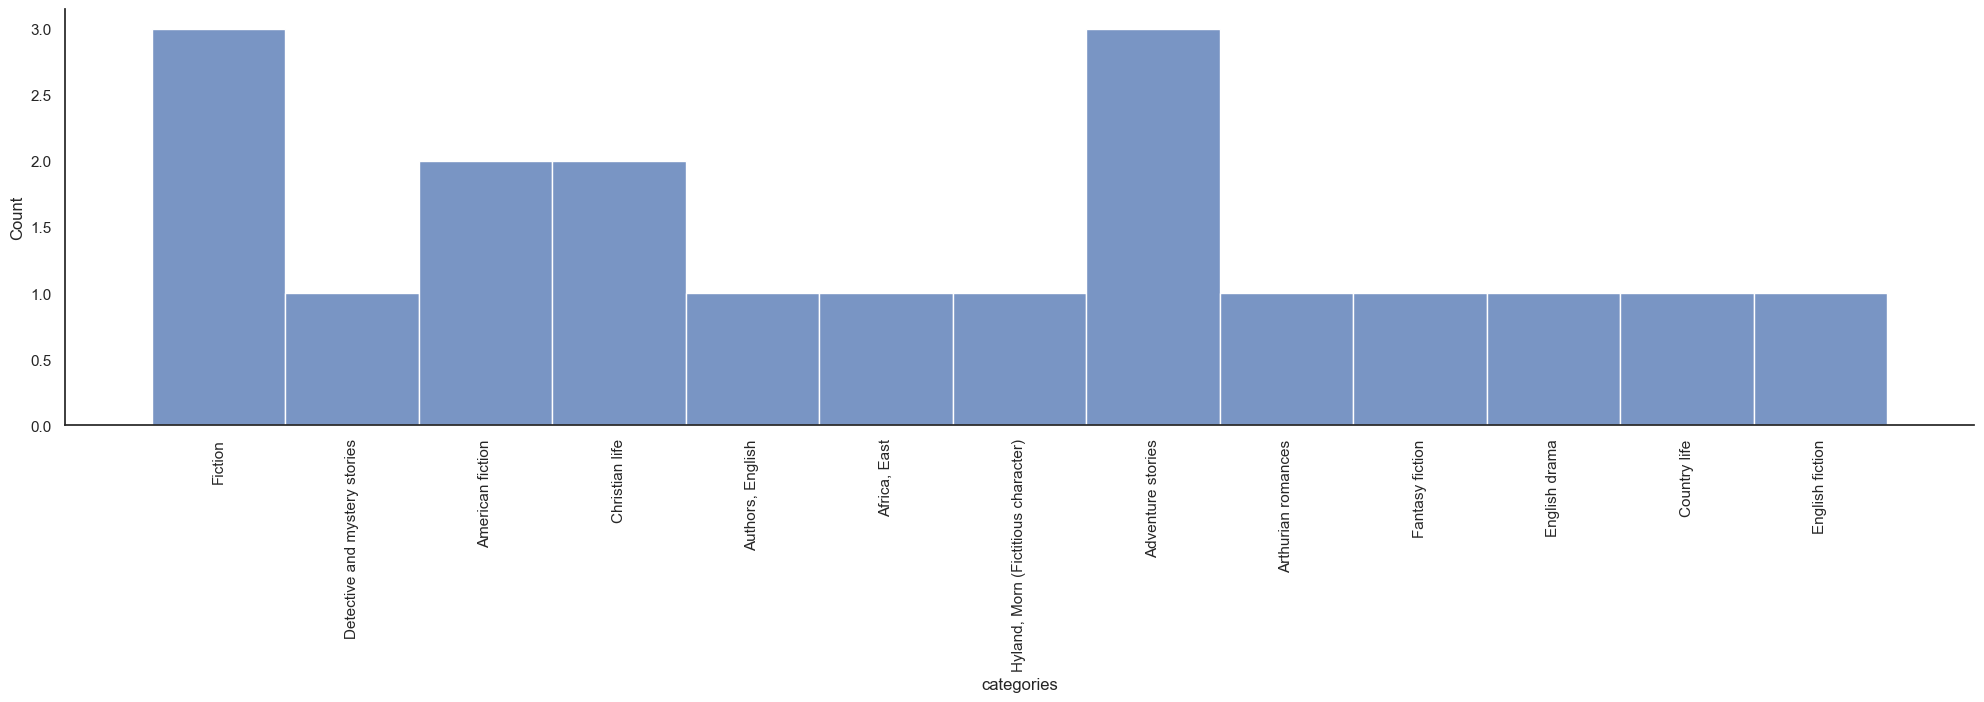

In [111]:

sns.displot(new_book['categories'][:20] ,height=5, aspect=4)
plt.xticks(rotation=90)
plt.show()

In [112]:
# category_counts = new_book['categories'].value_counts()

# # Plot
# plt.figure(figsize=(20, 5))
# sns.barplot(x=category_counts.index, y=category_counts.values)
# plt.xticks(rotation=90)
# plt.xlabel("Categories")
# plt.ylabel("Count")
# plt.title("Category Distribution")
# plt.show()

Dealing with short description(meaningless)

In [115]:
new_book['words_in_Description'] = new_book['description'].str.split().str.len()

In [117]:
new_book.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_Description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45


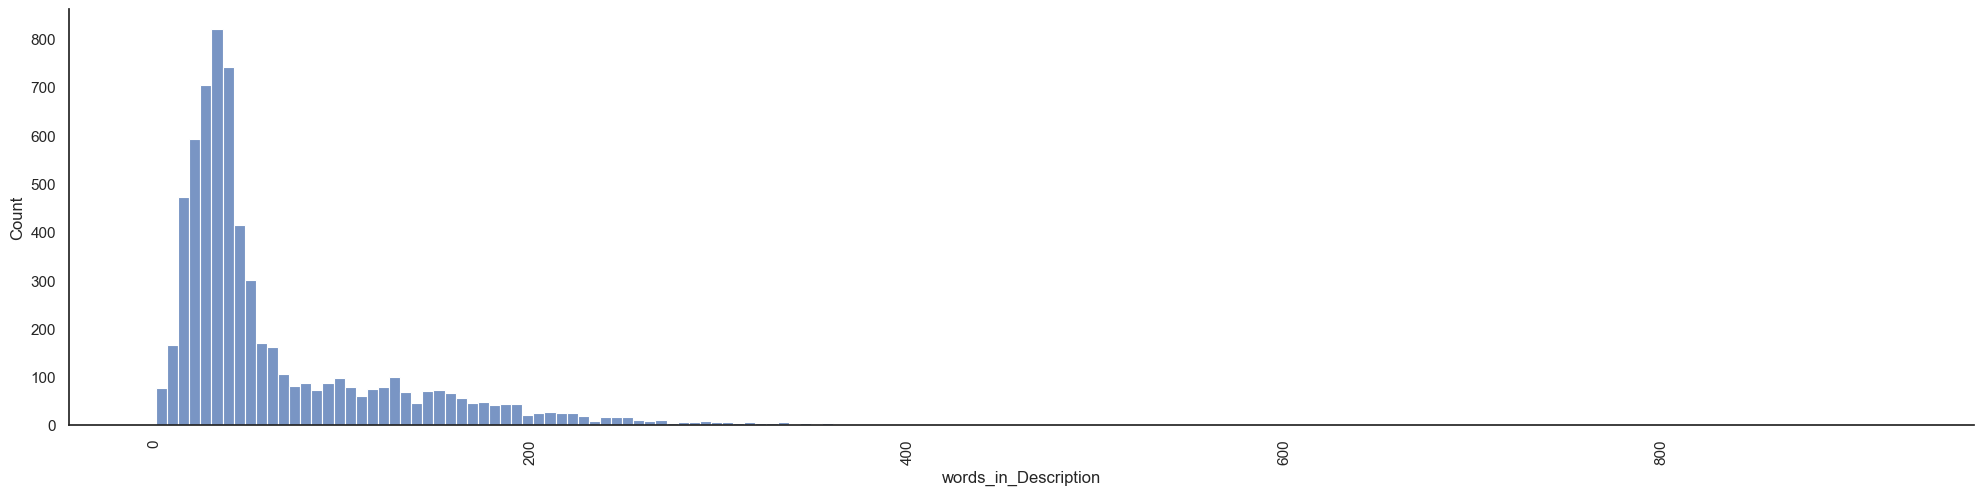

In [121]:

sns.displot(new_book['words_in_Description'],height=5, aspect=4)
plt.xticks(rotation=90)
plt.show()

In [126]:
new_book[new_book['words_in_Description'].between(1,4)]['description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [127]:
new_book[new_book['words_in_Description'].between(5,14)]['description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [128]:
book_missing_25_words = new_book[new_book['words_in_Description']>=25]

In [130]:
book_missing_25_words.shape

(5197, 15)

Creating some final variables

In [133]:
book_missing_25_words['title_and_subtitle']  =np.where(book_missing_25_words['subtitle'].isna(),book_missing_25_words['title'],book_missing_25_words[['title','subtitle']].astype(str).agg(" ".join,axis=1))

C:\Users\nisam\AppData\Local\Temp\ipykernel_28520\3398144652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['title_and_subtitle']  =np.where(book_missing_25_words['subtitle'].isna(),book_missing_25_words['title'],book_missing_25_words[['title','subtitle']].astype(str).agg(" ".join,axis=1))


In [135]:
book_missing_25_words['title_and_subtitle']

0                                                  Gilead
1                                    Spider's Web A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6802                                    Mistaken Identity
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805        I Am that Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
Name: title_and_subtitle, Length: 5197, dtype: object

tagging description with isbn

In [136]:
book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(" ".join,axis=1)

C:\Users\nisam\AppData\Local\Temp\ipykernel_28520\3457637377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(" ".join,axis=1)


In [138]:
book_missing_25_words['tagged_description']

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6802    9788172235222 On A Train Journey Home To North...
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [140]:
final_Df = book_missing_25_words.drop(['subtitle','missing_description','age_of_book','words_in_Description'],axis=1)

In [142]:
final_Df.to_csv('book_prepared.csv',index=False)

Word2Vec architect|ure converting words into meaningful vectors